In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
%matplotlib inline
import seaborn as sns
import datetime as Datetime
import keras
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.layers import Bidirectional, CuDNNLSTM
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [332]:
# read the training data
data = pd.read_excel('challenge_dataset.xlsx')
data.head()

,ID_TestSet,file,bx,by,bz,bl,bm,bn,bmag,vx,vy,vz,vmag,np,tpar,tper,goal
0,2,55,0.52,3.99,-2.53,0.12,-4.74,-0.33,4.75,-212.49,126.52,94.29,264.67,5.51,141.67,157.74,2
1,2,55,-0.46,2.83,-0.37,1.47,-2.49,-0.08,2.89,-205.30,121.80,91.70,255.72,6.51,139.22,154.13,2
2,2,55,0.63,3.69,-2.23,0.10,-4.36,-0.12,4.36,-208.85,119.43,89.61,256.73,6.15,144.39,151.92,2
3,2,55,1.71,3.79,-1.89,-0.25,-4.46,0.94,4.57,-205.67,124.33,91.95,257.32,6.06,148.72,164.85,2
4,2,55,0.69,0.82,0.04,0.05,-0.80,0.72,1.08,-212.35,120.57,95.26,262.10,5.97,183.88,153.38,2


In [333]:
df = data
df.head()

,ID_TestSet,file,bx,by,bz,bl,bm,bn,bmag,vx,vy,vz,vmag,np,tpar,tper,goal
0,2,55,0.52,3.99,-2.53,0.12,-4.74,-0.33,4.75,-212.49,126.52,94.29,264.67,5.51,141.67,157.74,2
1,2,55,-0.46,2.83,-0.37,1.47,-2.49,-0.08,2.89,-205.30,121.80,91.70,255.72,6.51,139.22,154.13,2
2,2,55,0.63,3.69,-2.23,0.10,-4.36,-0.12,4.36,-208.85,119.43,89.61,256.73,6.15,144.39,151.92,2
3,2,55,1.71,3.79,-1.89,-0.25,-4.46,0.94,4.57,-205.67,124.33,91.95,257.32,6.06,148.72,164.85,2
4,2,55,0.69,0.82,0.04,0.05,-0.80,0.72,1.08,-212.35,120.57,95.26,262.10,5.97,183.88,153.38,2


In [338]:
# we are performing binary classification so are target class will be 0,1. Hence 0 will be set 0 and 1,2 will be set to 1
df['goal2'] = df['goal'].map(lambda x: 1 if x >= 1 else 0)
df.drop(['goal'],axis=1)

,ID_TestSet,file,bx,by,bz,bl,bm,bn,bmag,vx,vy,vz,vmag,np,tpar,tper,goal2
0,2,55,0.52,3.99,-2.53,0.12,-4.74,-0.33,4.75,-212.49,126.52,94.29,264.67,5.51,141.67,157.74,1
1,2,55,-0.46,2.83,-0.37,1.47,-2.49,-0.08,2.89,-205.30,121.80,91.70,255.72,6.51,139.22,154.13,1
2,2,55,0.63,3.69,-2.23,0.10,-4.36,-0.12,4.36,-208.85,119.43,89.61,256.73,6.15,144.39,151.92,1
3,2,55,1.71,3.79,-1.89,-0.25,-4.46,0.94,4.57,-205.67,124.33,91.95,257.32,6.06,148.72,164.85,1
4,2,55,0.69,0.82,0.04,0.05,-0.80,0.72,1.08,-212.35,120.57,95.26,262.10,5.97,183.88,153.38,1
5,2,55,2.89,2.43,-1.32,-1.26,-3.25,1.97,4.00,-228.69,140.36,97.01,285.32,5.51,197.75,155.72,1
6,2,55,1.55,8.06,-5.51,-0.29,-9.87,-0.50,9.88,-241.14,161.08,92.58,304.42,5.11,195.69,162.02,1
7,2,55,0.85,8.12,-5.18,0.35,-9.62,-0.87,9.67,-252.69,148.91,94.77,308.23,4.80,197.47,163.86,1
8,2,55,-0.15,6.25,-5.56,-0.26,-8.06,-2.22,8.37,-253.78,148.75,98.44,310.20,4.98,177.55,157.58,1
9,2,55,2.42,8.29,-7.41,-1.88,-11.19,-0.87,11.39,-255.88,139.91,92.58,305.98,4.58,162.64,185.55,1


In [339]:
df.head()

,ID_TestSet,file,bx,by,bz,bl,bm,bn,bmag,vx,vy,vz,vmag,np,tpar,tper,goal,goal2
0,2,55,0.52,3.99,-2.53,0.12,-4.74,-0.33,4.75,-212.49,126.52,94.29,264.67,5.51,141.67,157.74,2,1
1,2,55,-0.46,2.83,-0.37,1.47,-2.49,-0.08,2.89,-205.30,121.80,91.70,255.72,6.51,139.22,154.13,2,1
2,2,55,0.63,3.69,-2.23,0.10,-4.36,-0.12,4.36,-208.85,119.43,89.61,256.73,6.15,144.39,151.92,2,1
3,2,55,1.71,3.79,-1.89,-0.25,-4.46,0.94,4.57,-205.67,124.33,91.95,257.32,6.06,148.72,164.85,2,1
4,2,55,0.69,0.82,0.04,0.05,-0.80,0.72,1.08,-212.35,120.57,95.26,262.10,5.97,183.88,153.38,2,1


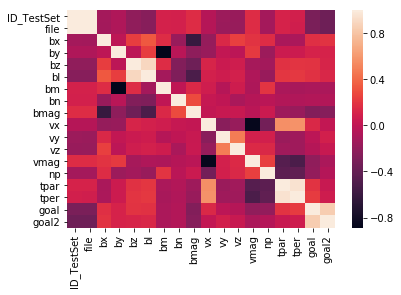

In [340]:
# check the correlation between features
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Normalize the data

In [341]:
# MinMax normalization
# we normalize the columnns in the training data
train_df = data
cols_normalize = train_df.columns.difference(['ID_TestSet','file','goal'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head()

,ID_TestSet,file,bx,by,bz,bl,bm,bn,bmag,vx,vy,vz,vmag,np,tpar,tper,goal,goal2
0,2,55,0.830850,0.446224,0.631946,0.791192,0.511947,0.421807,0.017356,0.431023,0.764555,0.645218,0.362104,0.038302,0.013629,0.020626,2,1.0
1,2,55,0.826580,0.436446,0.646286,0.796235,0.531711,0.424278,0.008560,0.438072,0.759976,0.642756,0.349659,0.045255,0.013365,0.020129,2,1.0
2,2,55,0.831329,0.443695,0.633937,0.791117,0.515285,0.423883,0.015512,0.434592,0.757677,0.640769,0.351063,0.042752,0.013923,0.019825,2,1.0
3,2,55,0.836035,0.444538,0.636195,0.789810,0.514406,0.434361,0.016505,0.437709,0.762431,0.642994,0.351884,0.042126,0.014391,0.021605,2,1.0
4,2,55,0.831590,0.419504,0.649008,0.790930,0.546557,0.432187,0.000000,0.431161,0.758783,0.646140,0.358530,0.041501,0.018190,0.020026,2,1.0


In [343]:
# preparing data for visualizations 
# we visualize data for timeseries with ID_TESTSET -> 2
# We will be feeding LSTM network this type of data for each time step for each id.
id3 = train_df[train_df['ID_TestSet'] == 2]

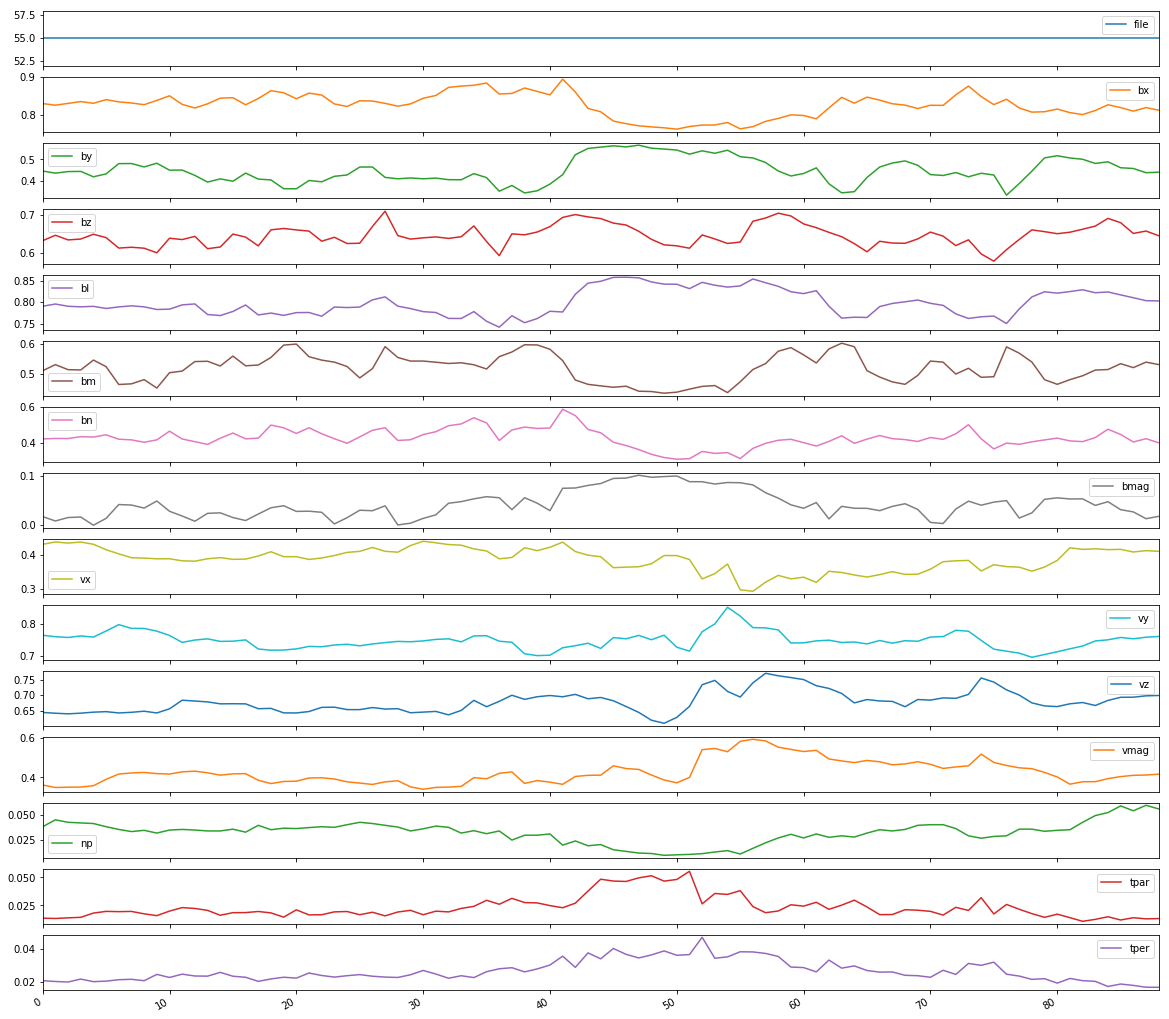

In [345]:
# plotting 
cols1 = ['file', 'bx', 'by', 'bz', 'bl', 'bm', 'bn', 'bmag', 'vx', 'vy','vz','vmag','np','tpar','tper']
id3_Window1 = id3[cols1]

ax1 = id3_Window1.plot(subplots=True, sharex=True, figsize=(20,20))

In [346]:
# pick the feature columns for training
sequence_cols = ['bx', 'by', 'bz', 'bl', 'bm', 'bn', 'bmag', 'vx', 'vy','vz','vmag','np','tpar','tper']

In [347]:
sequence_length = 50 

LSTM layers expect an input in the shape of a numpy array of 3 dimensions (samples, time steps, features) where samples is the number of training sequences, time steps is the look back window or sequence length and features is the number of features of each sequence at each time step.

In [348]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [349]:
seq_gen = (list(gen_sequence(df[df['ID_TestSet']==id], sequence_length, sequence_cols)) 
           for id in train_df['ID_TestSet'].unique())

In [350]:
# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(7995, 50, 14)

In [351]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    return data_matrix[seq_length:num_elements, :]

In [352]:
# generate labels
label_gen = [gen_labels(train_df[train_df['ID_TestSet']==id], sequence_length, ['goal2']) 
             for id in train_df['ID_TestSet'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(7995, 1)

LSTM network

we build a deep network. The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units. Dropout is also applied after each LSTM layer to control overfitting. Final layer is a Dense output layer with single unit and sigmoid activation since this is a binary classification problem.

We also use CUDA for using the CuDNNLSTM functionality for efficient computing.

In [353]:
# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(CuDNNLSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=nb_out, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [354]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_2 (CuDNNLSTM)     (None, 50, 100)           46400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50, 100)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 76,651
Trainable params: 76,651
Non-trainable params: 0
_________________________________________________________________
None


In [356]:
%%time
# fit the network
model.fit(seq_array, label_array, epochs=15, batch_size=200, validation_split=0.05, verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])

Train on 7595 samples, validate on 400 samples
Epoch 1/15
7595/7595 [==============================] - 4s 463us/step - loss: 0.1479 - acc: 0.9476 - val_loss: 2.6399 - val_acc: 0.5050
Epoch 2/15
7595/7595 [==============================] - 3s 441us/step - loss: 0.0817 - acc: 0.9692 - val_loss: 2.8775 - val_acc: 0.4650
Wall time: 6.87 s


In [357]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))

7995/7995 [==============================] - 1s 94us/step
Accurracy: 0.956472796358266


In [358]:
# make predictions and compute confusion matrix
y_pred = model.predict_classes(seq_array,verbose=1, batch_size=200)
y_true = label_array
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm

7995/7995 [==============================] - 1s 117us/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[2020,  320],
       [  28, 5627]], dtype=int64)

In [359]:
# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

precision =  0.946191356986716 
 recall =  0.9950486295313882


ROC curve

In [363]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred)

In [364]:
auc_keras = auc(fpr_keras, tpr_keras)

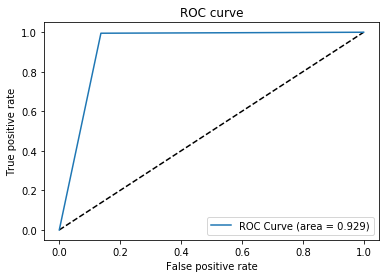

In [365]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ROC Curve (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()